<a href="https://colab.research.google.com/github/MarkCheungYT/Projects/blob/main/Airline_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Field,Description
ID,Unique passenger identifier
Gender,Gender of the passenger (Female/Male)
Age,Age of the passenger
Customer Type,Type of airline customer (First-time/Returning)
Type of Travel,Purpose of the flight (Business/Personal)
Class,Travel class in the airplane for the passenger seat #'Business', 'Economy', 'Economy Plus'
Flight Distance,Flight distance in miles
Departure Delay,Flight departure delay in minutes
Arrival Delay,Flight arrival delay in minutes
Departure and Arrival Time Convenience,"Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
Ease of Online Booking,"Satisfaction level with the online booking experience from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
Check-in Service,"Satisfaction level with the check-in service from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
Online Boarding,"Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
Gate Location,"Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
On-board Service,"Satisfaction level with the on-boarding service in the airport from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
Seat Comfort,"Satisfaction level with the comfort of the airplane seat from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
Leg Room Service,"Satisfaction level with the leg room of the airplane seat from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
Cleanliness,"Satisfaction level with the cleanliness of the airplane from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
Food and Drink,"Satisfaction level with the food and drinks on the airplane from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
In-flight Service,"Satisfaction level with the in-flight service from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
In-flight Wifi Service,"Satisfaction level with the in-flight Wifi service from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
In-flight Entertainment,"Satisfaction level with the in-flight entertainment from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
Baggage Handling,"Satisfaction level with the baggage handling from the airline from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
Satisfaction,Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied)


In [ ]:
#Change layout of "Age"


In [ ]:
#Task
#For the satisfaction level=0, replace it by 3
 #missing value on arrival delay
 #outliers on departure delay, arrival delay
 #plot graph with score to  each criteria

 #Which percentage of airline passengers are satisfied? Does it vary by customer type? What about type of travel?

#What is the customer profile for a repeating airline passenger?

#Does flight distance affect customer preferences or flight patterns?

#Which factors contribute to customer satisfaction the most? What about dissatisfaction?

In [ ]:
from itertools import product, combinations, permutations
import random
import math

from sklearn import datasets
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train=pd.read_csv("airline_passenger_satisfaction.csv")

In [ ]:
df_train.shape

(129880, 24)

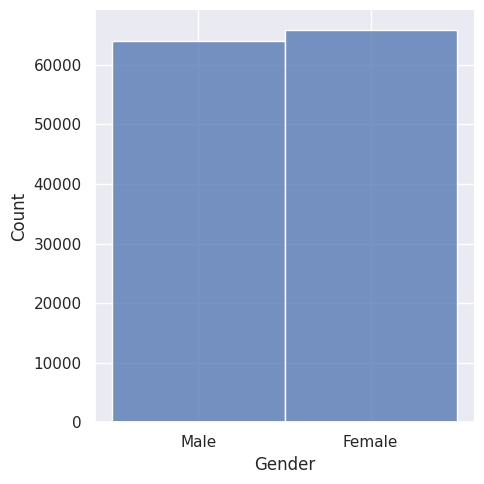

In [ ]:
# Apply the default theme
sns.set_theme()

# Load an example dataset
#tips = sns.load_dataset("tips")

# Create a visualization
sns.displot(
    data=df_train,
    x="Gender"
)

<Axes: xlabel='Age', ylabel='count'>

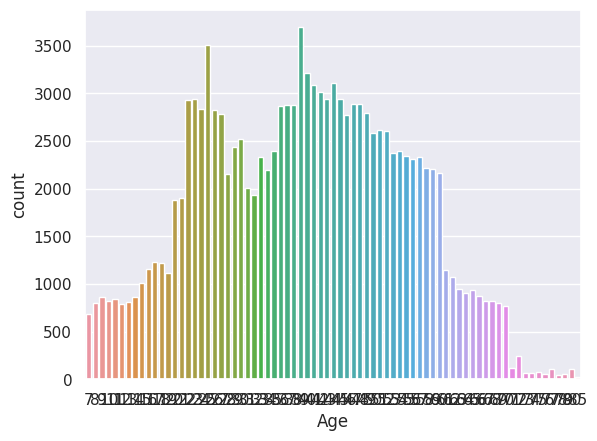

In [ ]:
sns.set_theme()

sns.countplot(
    data=df_train,
    x="Age",
    orient='h'
 )

In [ ]:
df1=df_train.groupby(['Type of Travel','Class']).agg({'ID':'count'})

In [ ]:
df1

ID
Type of Travel Class              
Business       Business      59487
               Economy       25304
               Economy Plus   4902
Personal       Business       2673
               Economy       33005
               Economy Plus   4509

In [ ]:
df2=df1.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

<ipython-input-10-5e0d7dde6d78>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df2=df1.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


In [ ]:
df2

ID
Type of Travel Class                  
Business       Business      66.322901
               Economy       28.211789
               Economy Plus   5.465309
Personal       Business       6.651405
               Economy       82.128549
               Economy Plus  11.220046

In [ ]:
df3=df_train.groupby(['Class','Satisfaction']).agg({'ID':'count'})

In [ ]:
df4=df3.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

<ipython-input-15-7924f92e37e1>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df4=df3.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


In [ ]:
df4

ID
Class        Satisfaction                      
Business     Neutral or Dissatisfied  30.556628
             Satisfied                69.443372
Economy      Neutral or Dissatisfied  81.232743
             Satisfied                18.767257
Economy Plus Neutral or Dissatisfied  75.358623
             Satisfied                24.641377

In [ ]:
df_train.groupby(['Customer Type','Satisfaction']).agg({'ID':'count'})

ID
Customer Type Satisfaction       
First-time    0             18080
              1              5700
Returning     0             55372
              1             50728

In [ ]:
columns=['Gender','Customer Type', 'Type of Travel', 'Class']

In [ ]:
columns[0]

'ID'

In [ ]:
#Satisfaction
#First time vs Returning
#Business vs Personal
#Business vs Economy
for i in range(len(columns)):
  print (df_train.groupby([columns[i],'Satisfaction']).agg({'ID':'count'}))

                                   ID
Gender Satisfaction                  
Female Neutral or Dissatisfied  37630
       Satisfied                28269
Male   Neutral or Dissatisfied  35822
       Satisfied                28159
                                          ID
Customer Type Satisfaction                  
First-time    Neutral or Dissatisfied  18080
              Satisfied                 5700
Returning     Neutral or Dissatisfied  55372
              Satisfied                50728
                                           ID
Type of Travel Satisfaction                  
Business       Neutral or Dissatisfied  37337
               Satisfied                52356
Personal       Neutral or Dissatisfied  36115
               Satisfied                 4072
                                         ID
Class        Satisfaction                  
Business     Neutral or Dissatisfied  18994
             Satisfied                43166
Economy      Neutral or Dissatisfied  47366
      

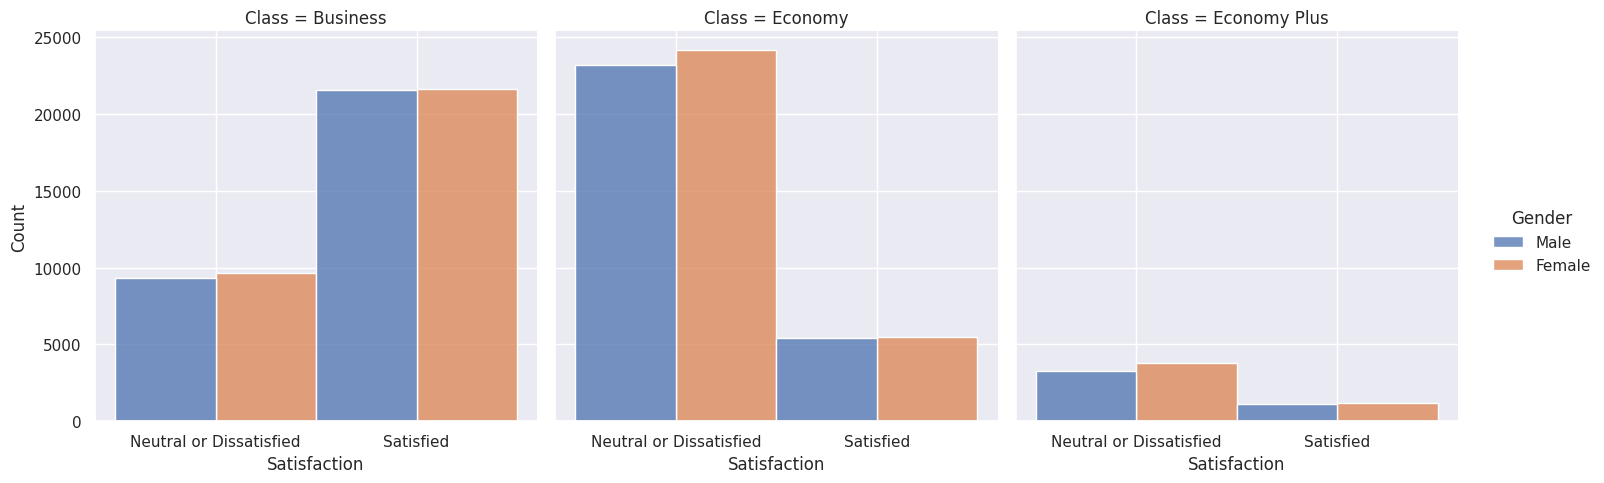

In [ ]:
#Class affect satisfaction
sns.displot(data=df_train, x="Satisfaction", col="Class",hue="Gender",multiple="dodge")

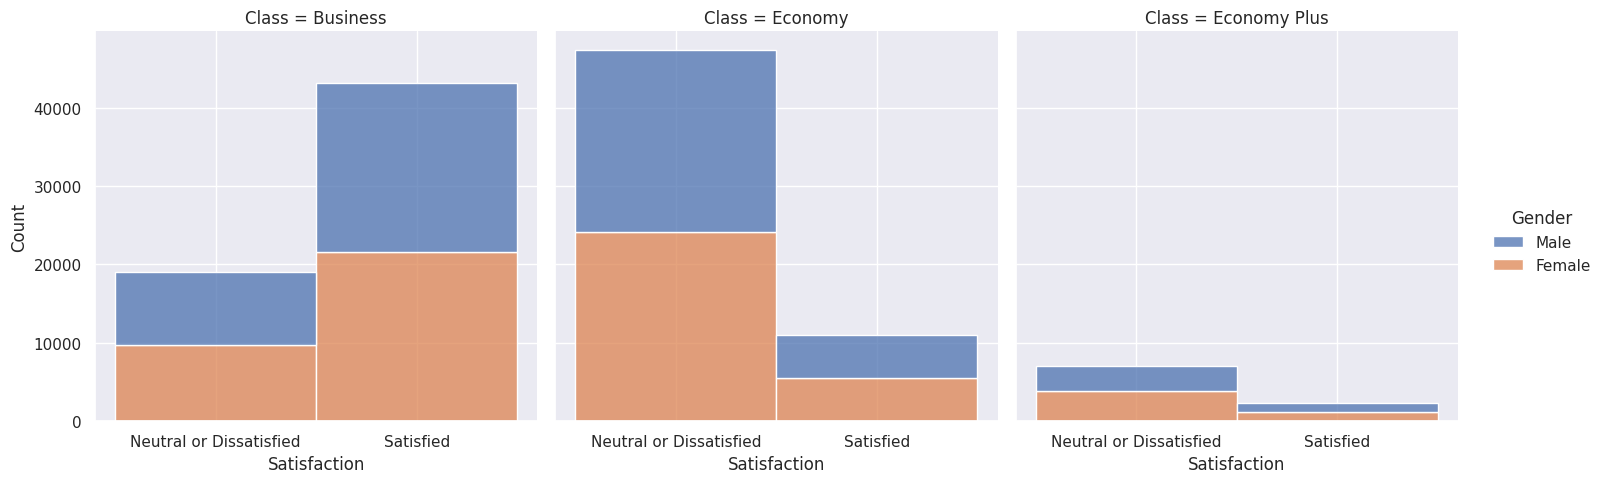

In [ ]:
#Class affect satisfaction
sns.displot(data=df_train, x="Satisfaction", col="Class",hue="Gender",multiple="stack")

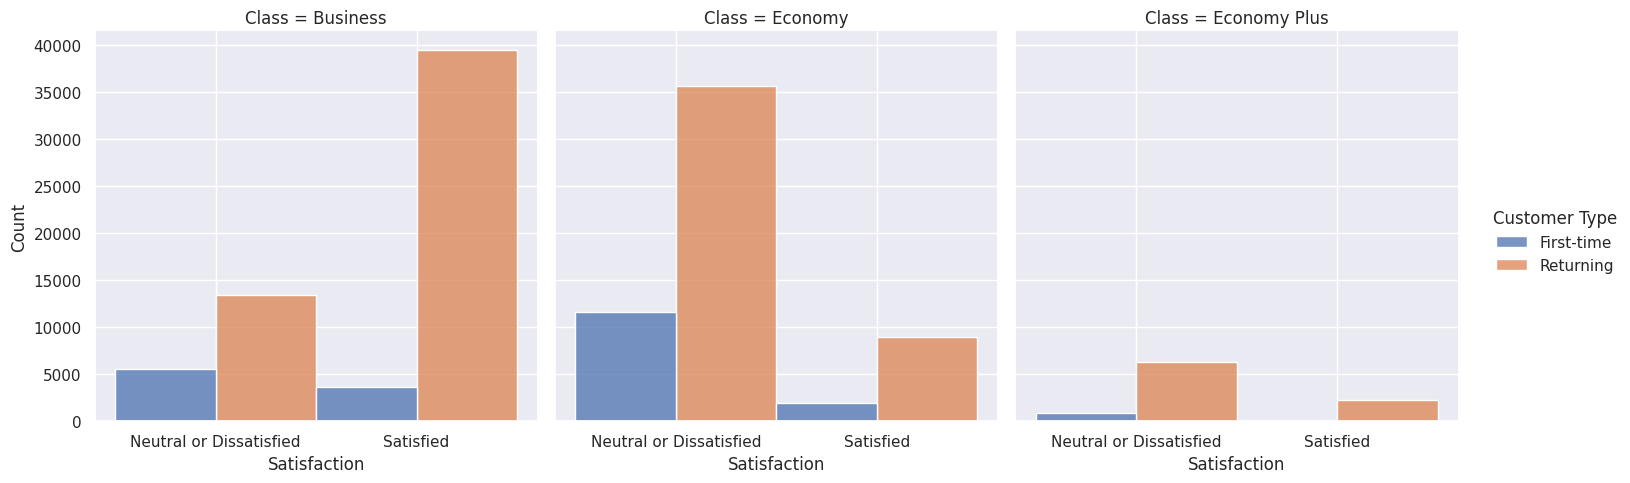

In [ ]:
sns.displot(data=df_train, x="Satisfaction", col="Class",hue="Customer Type",multiple="dodge")

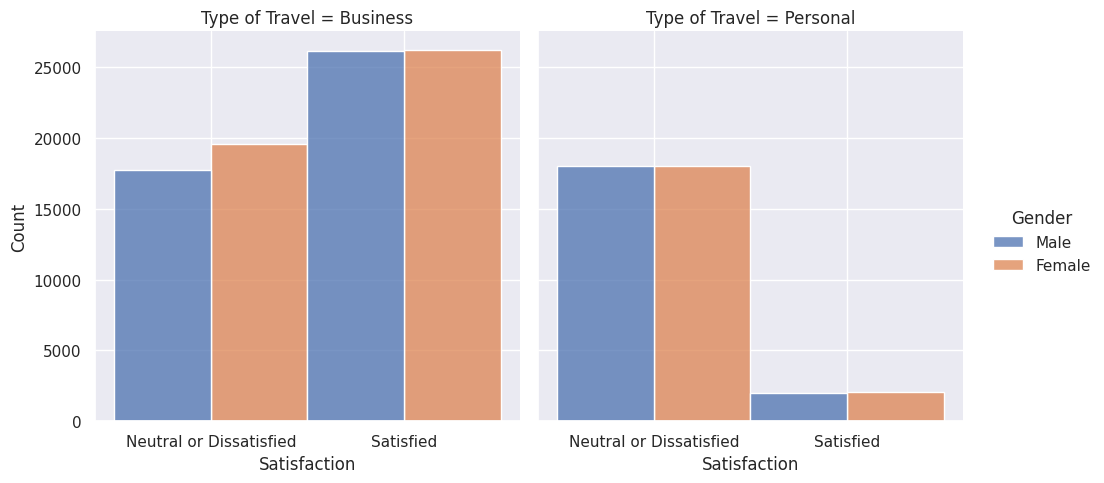

In [ ]:
#Class affect satisfaction
sns.displot(data=df_train, x="Satisfaction", col="Type of Travel",hue="Gender",multiple="dodge")

<Axes: xlabel='Departure Delay', ylabel='Arrival Delay'>

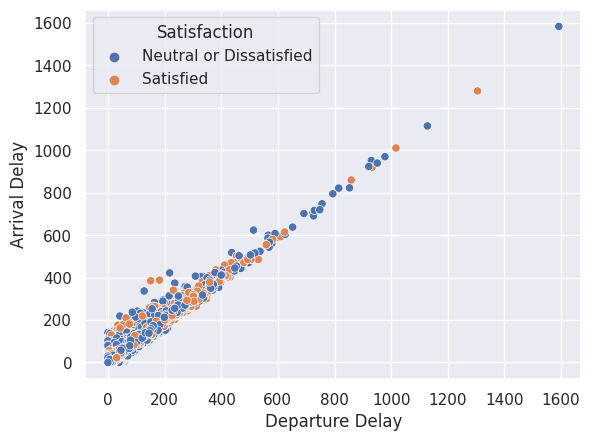

In [ ]:
#Arrival Delay , no
sns.scatterplot(data=df_train, x="Departure Delay", y="Arrival Delay",hue="Satisfaction")

In [ ]:
#arrival
df_train['Satisfaction']=df_train['Satisfaction'].replace('Satisfied',1)


<Axes: xlabel='Flight Distance', ylabel='Arrival Delay'>

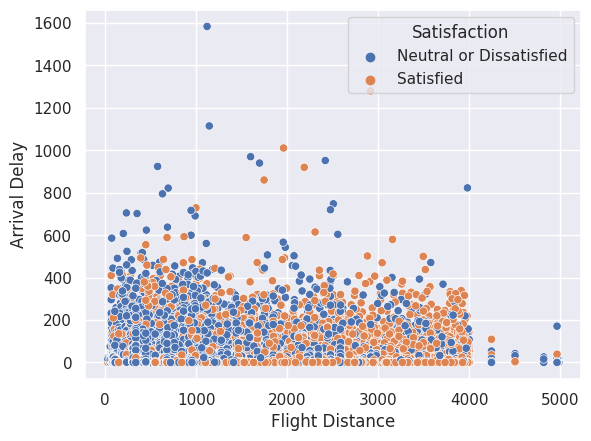

In [ ]:
#short flight distance + with arrival delay-->Dissatisfied
sns.scatterplot(data=df_train, x="Flight Distance", y="Arrival Delay",hue="Satisfaction")

In [ ]:
#many people no fill in the data?-->NO
df_train.groupby(['Cleanliness','Satisfaction']).agg({'ID':'count'})

ID
Cleanliness Satisfaction                  
0           Neutral or Dissatisfied     14
1           Neutral or Dissatisfied  13434
            Satisfied                 3295
2           Neutral or Dissatisfied  15836
            Satisfied                 4277
3           Neutral or Dissatisfied  17370
            Satisfied                13269
4           Neutral or Dissatisfied  15786
            Satisfied                18183
5           Neutral or Dissatisfied  11012
            Satisfied                17404

In [ ]:
#many people no fill in the data?-->NO
df_train.groupby('In-flight Wifi Service').agg({'ID':'count'})

,ID
In-flight Wifi Service,
0,3916
1,22328
2,32320
3,32185
4,24775
5,14356


In [ ]:
survey=['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']
for i in range(len(survey)):
  print (df_train.groupby([survey[i],'Satisfaction']).agg({'ID':'count'}))

                                                                   ID
Departure and Arrival Time Convenience Satisfaction                  
0                                      Neutral or Dissatisfied   3467
                                       Satisfied                 3214
1                                      Neutral or Dissatisfied   9891
                                       Satisfied                 9518
2                                      Neutral or Dissatisfied  11957
                                       Satisfied                 9577
3                                      Neutral or Dissatisfied  12539
                                       Satisfied                 9839
4                                      Neutral or Dissatisfied  19491
                                       Satisfied                12389
5                                      Neutral or Dissatisfied  16107
                                       Satisfied                11891
                    

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_train.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
df_train.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df_train['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [ ]:
df_train['In-flight Entertainment'].unique()

array([5, 3, 4, 2, 1, 0])

In [ ]:
df_train['Customer Type'].unique()

array(['First-time', 'Returning'], dtype=object)

In [ ]:
df_train.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [ ]:
df_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df_train['travel_delay']=df_train['Arrival Delay']-df_train['Departure Delay']

In [ ]:
df_train['travel_delay']

0          3.0
1         13.0
2          0.0
3          0.0
4          1.0
          ... 
129875     1.0
129876     0.0
129877     8.0
129878    -9.0
129879     0.0
Name: travel_delay, Length: 129880, dtype: float64

In [ ]:
#Which percentage of airline passengers are satisfied? Does it vary by customer type? What about type of travel?
#total Satisfied Passenger
len(df_train[df_train['Satisfaction']=="Satisfied"])
len(df_train)
#What is the customer profile for a repeating airline passenger?

#Does flight distance affect customer preferences or flight patterns?

#Which factors contribute to customer satisfaction the most? What about dissatisfaction?

129880

In [ ]:
#Which percentage of airline passengers are satisfied?
len(df_train[df_train['Satisfaction']=="Satisfied"])

56428

In [ ]:
len(df_train[df_train['Satisfaction']=="Satisfied"])/len(df_train)

0.43446258084385586

In [ ]:
df_train['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [ ]:
df_train['Type of Travel'].unique()

array(['Business', 'Personal'], dtype=object)

In [ ]:
Business_satisfied = len(df_train[(df_train['Satisfaction']=="Satisfied") & (df_train["Class"]=='Business')])

In [ ]:
Business_satisfied

43166

In [ ]:
Business=len(df_train[df_train['Satisfaction']=="Satisfied"])

In [ ]:
Business

56428

In [ ]:
Type_of_travel_table=df_train.groupby(['Type of Travel','Satisfaction']).agg({'ID':'count'})

In [ ]:
Type_of_travel_table

ID
Type of Travel Satisfaction                  
Business       Neutral or Dissatisfied  37337
               Satisfied                52356
Personal       Neutral or Dissatisfied  36115
               Satisfied                 4072

In [ ]:
df_train['Departure and Arrival Time Convenience']=df_train['Departure and Arrival Time Convenience'].replace(0,3)

In [ ]:
df_train['Satisfaction']=df_train['Satisfaction'].replace('Satisfied',1)

In [ ]:
df_train['Satisfaction']=df_train['Satisfaction'].replace('Neutral or Dissatisfied',0)

In [ ]:
df_train['Satisfaction'].unique()

array([0, 1])

In [ ]:
df_train['Departure and Arrival Time Convenience'].unique()

array([3, 2, 4, 1, 5])

In [ ]:
survey=['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

for i in range(len(survey)):
  df_train[survey[i]]=df_train[survey[i]].replace(0,3)

In [ ]:
df_train['Ease of Online Booking'].unique()

array([3, 2, 4, 1, 5])

In [ ]:
import numpy as np
X=df_train[survey]
y=df_train['Satisfaction']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8274561133353865

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

param = {'max_depth': 10, 'eta': 0.3, 'objective': 'binary:hinge'}

model=xgb.train(params=param, dtrain=dtrain)
y_pred_val=model.predict(dtest)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_val)

0.9256621496766245

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

param = {'max_depth': 10, 'eta': 0.3, 'objective': 'binary:logistic'}

model=xgb.train(params=param, dtrain=dtrain)
y_pred_val=model.predict(dtest)


In [ ]:
y_pred_val

array([0.1014969 , 0.9751892 , 0.97496563, ..., 0.974843  , 0.06468741,
       0.9743149 ], dtype=float32)

In [ ]:
y_pred_val.shape

(25976,)

In [ ]:
len(y_pred_val)

25976

In [ ]:
y_test

103044    0
43282     1
65543     1
65083     1
76496     1
         ..
121239    0
6010      0
101127    1
82323     0
61871     1
Name: Satisfaction, Length: 25976, dtype: int64

In [ ]:
def a(x):
  for i in range(len(y_pred_val)):
    if y_pred_val[i]>=0.5:
      y_pred_val[i]=1
    else:
      y_pred_val[i]=0


In [ ]:
a(y_pred_val)

In [ ]:
y_pred_val

array([0., 1., 1., ..., 1., 0., 1.], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_val)

0.9267400677548506

In [ ]:
df_train.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [ ]:
model.get_score(importance_type='gain')

{'Departure and Arrival Time Convenience': 33.619056701660156,
 'Ease of Online Booking': 11.88776683807373,
 'Check-in Service': 15.129257202148438,
 'Online Boarding': 202.64166259765625,
 'Gate Location': 19.488290786743164,
 'On-board Service': 12.38591194152832,
 'Seat Comfort': 14.93689250946045,
 'Leg Room Service': 21.664581298828125,
 'Cleanliness': 17.430118560791016,
 'Food and Drink': 27.0131893157959,
 'In-flight Service': 12.79737377166748,
 'In-flight Wifi Service': 262.8964538574219,
 'In-flight Entertainment': 64.33547973632812,
 'Baggage Handling': 13.991113662719727}

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

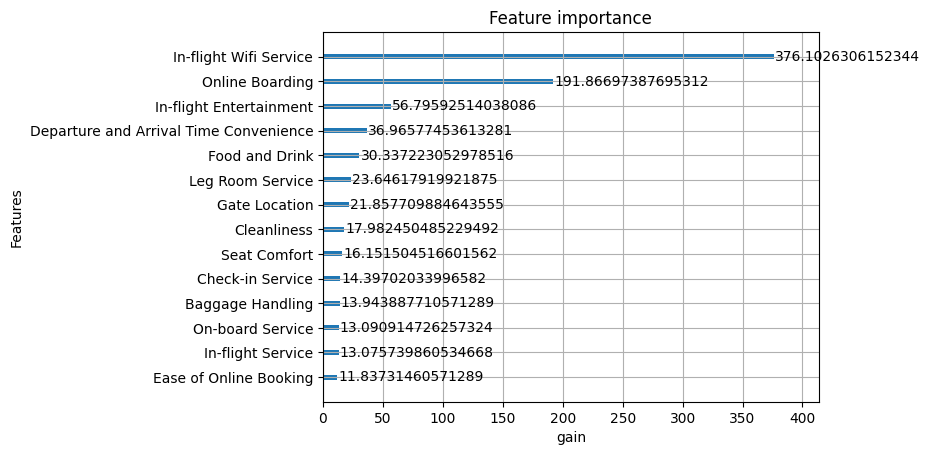

In [ ]:
xgb.plot_importance(model,importance_type='gain',xlabel='gain')

In [ ]:
model.get_score(importance_type='weight')

{'Departure and Arrival Time Convenience': 425.0,
 'Ease of Online Booking': 505.0,
 'Check-in Service': 448.0,
 'Online Boarding': 412.0,
 'Gate Location': 444.0,
 'On-board Service': 447.0,
 'Seat Comfort': 441.0,
 'Leg Room Service': 526.0,
 'Cleanliness': 290.0,
 'Food and Drink': 288.0,
 'In-flight Service': 466.0,
 'In-flight Wifi Service': 229.0,
 'In-flight Entertainment': 302.0,
 'Baggage Handling': 501.0}

In [ ]:
from sklearn.model_selection import ParameterGrid
param = {'max_depth': [7,10] ,
         'eta': [0.1,0.3] ,
         'objective': ['binary:hinge'],
         'gamma':[0.1,0.3]
        }

best_score=0
for param in ParameterGrid(param):
  model=xgb.train(params=param, dtrain=dtrain,num_boost_round=3)
  y_pred_val=model.predict(dtest)
  val_score=accuracy_score(y_test,y_pred_val)
  print(param)
  print("Accuracy score:",accuracy_score(y_test,y_pred_val))
  if val_score>best_score:
    best_score=val_score
    best_param=param

{'eta': 0.1, 'gamma': 0.1, 'max_depth': 7, 'objective': 'binary:hinge'}
Accuracy score: 0.43320757622420697
{'eta': 0.1, 'gamma': 0.1, 'max_depth': 10, 'objective': 'binary:hinge'}
Accuracy score: 0.43320757622420697
{'eta': 0.1, 'gamma': 0.3, 'max_depth': 7, 'objective': 'binary:hinge'}
Accuracy score: 0.43320757622420697
{'eta': 0.1, 'gamma': 0.3, 'max_depth': 10, 'objective': 'binary:hinge'}
Accuracy score: 0.43320757622420697
{'eta': 0.3, 'gamma': 0.1, 'max_depth': 7, 'objective': 'binary:hinge'}
Accuracy score: 0.8622959655066215
{'eta': 0.3, 'gamma': 0.1, 'max_depth': 10, 'objective': 'binary:hinge'}
Accuracy score: 0.8740760702186634
{'eta': 0.3, 'gamma': 0.3, 'max_depth': 7, 'objective': 'binary:hinge'}
Accuracy score: 0.8622959655066215
{'eta': 0.3, 'gamma': 0.3, 'max_depth': 10, 'objective': 'binary:hinge'}
Accuracy score: 0.8740760702186634


In [ ]:
# Will feature importance varies with "Class"?

In [ ]:
df_train['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [ ]:
df_train_Business=df_train[df_train['Class']=='Business']

In [ ]:
df_train_Business.shape

(62160, 24)

In [ ]:
df_train_Economy=df_train[df_train['Class']=='Economy']

In [ ]:
df_train_Economy.shape

(58309, 24)

In [ ]:
df_train_Economy_Plus=df_train[df_train['Class']=='Economy Plus']

In [ ]:
table=[df_train_Business,df_train_Economy,df_train_Economy_Plus]

In [ ]:
table

In [ ]:
survey=['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

for i in range(len(survey)):
  df_train[survey[i]]=df_train[survey[i]].replace(0,3)

In [ ]:
df_train['Satisfaction']=df_train['Satisfaction'].replace('Satisfied',1)

In [ ]:
df_train['Satisfaction']=df_train['Satisfaction'].replace('Neutral or Dissatisfied',0)

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

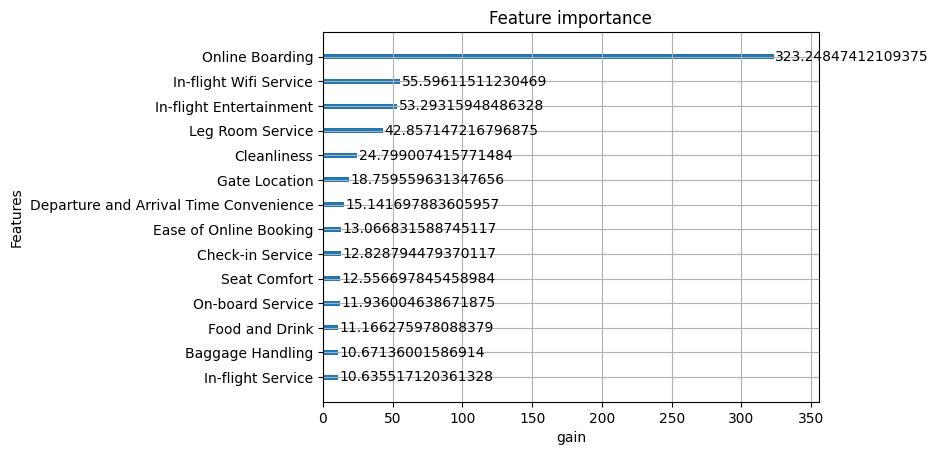

In [ ]:
import numpy as np
X=df_train_Business[survey]
y=df_train_Business['Satisfaction']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42)

import xgboost as xgb
# label_column specifies the index of the column containing the true label
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)
# Data Type is different -> DMatrix
param = {'max_depth': 10, 'eta': 0.3, 'objective': 'binary:hinge'}
# sklearn -> .fit, xgboost -> .train()
model=xgb.train(params=param, dtrain=dtrain)
y_pred_val=model.predict(dtest)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_val)

xgb.plot_importance(model,importance_type='gain',xlabel='gain')

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

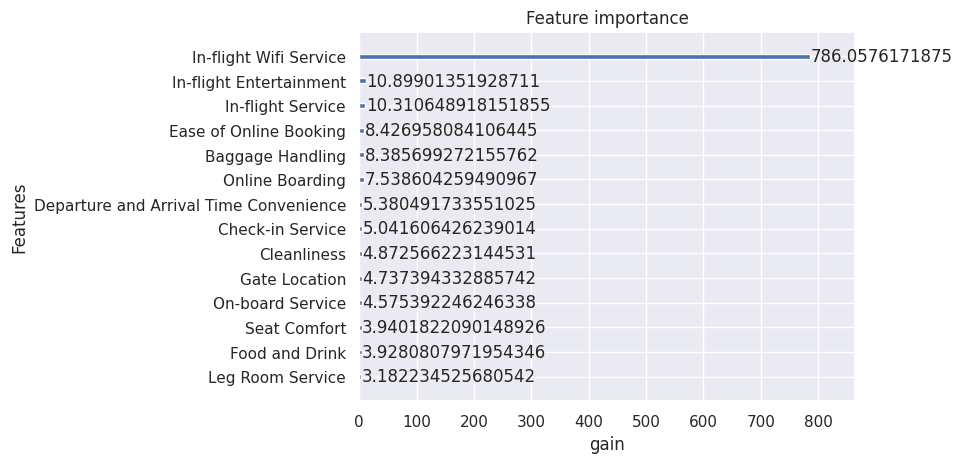

In [ ]:
import numpy as np
X=df_train_Economy[survey]
y=df_train_Economy['Satisfaction']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42)

import xgboost as xgb
# label_column specifies the index of the column containing the true label
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)
# Data Type is different -> DMatrix
param = {'max_depth': 10, 'eta': 0.3, 'objective': 'binary:hinge'}
# sklearn -> .fit, xgboost -> .train()
model=xgb.train(params=param, dtrain=dtrain)
y_pred_val=model.predict(dtest)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_val)

xgb.plot_importance(model,importance_type='gain',xlabel='gain')

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

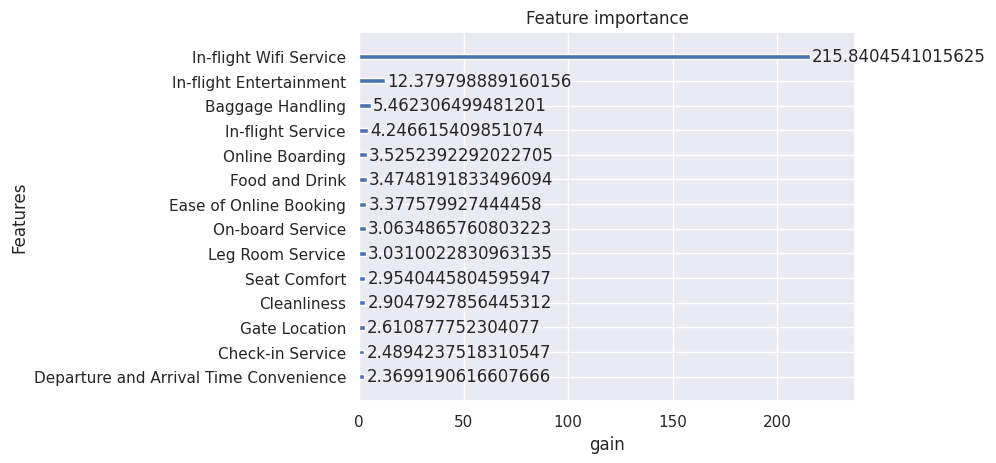

In [ ]:
import numpy as np
X=df_train_Economy_Plus[survey]
y=df_train_Economy_Plus['Satisfaction']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42)

import xgboost as xgb
# label_column specifies the index of the column containing the true label
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)
# Data Type is different -> DMatrix
param = {'max_depth': 10, 'eta': 0.3, 'objective': 'binary:hinge'}
# sklearn -> .fit, xgboost -> .train()
model=xgb.train(params=param, dtrain=dtrain)
y_pred_val=model.predict(dtest)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_val)

xgb.plot_importance(model,importance_type='gain',xlabel='gain')

In [ ]:
X_train.shape

(46647, 14)

In [ ]:
df_train['Customer Type'].unique()

array(['First-time', 'Returning'], dtype=object)

In [ ]:
#Shap on checking relationship on variable is in postive/negative releationship
#Story telling: add more question in presentation
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 9.6 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
pred = model.predict(df_train_Business)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_train_Business)
shap.summary_plot(shap_values, df_train_Business)

TypeError: ignored

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)
# Calculate Shap values
shap_values = explainer.shap_values(X_train)
shap.initjs()

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)
# Calculate Shap values
shap_values = explainer.shap_values(X_train)
shap.initjs()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


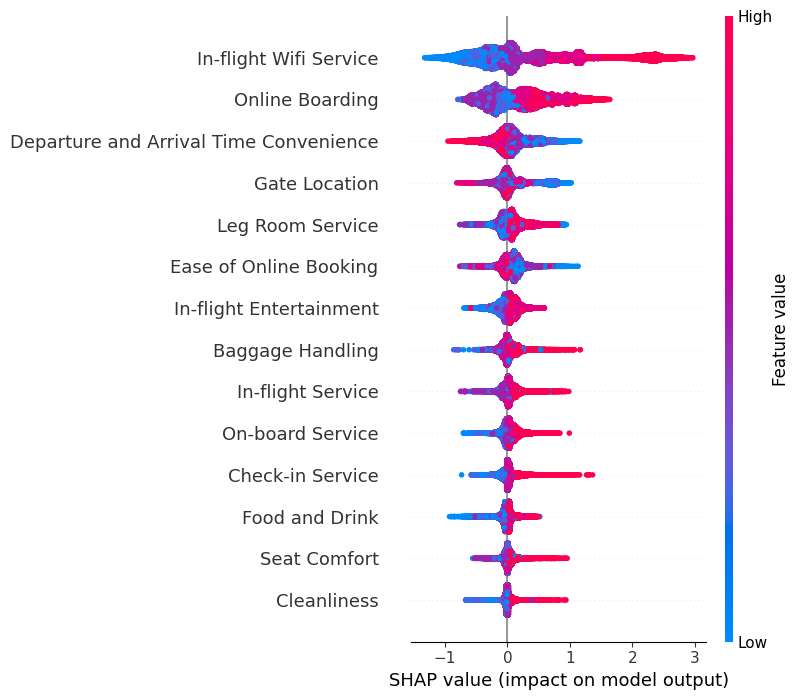

In [ ]:
shap.summary_plot(shap_values, X_train)